In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data from years 2015 to 2019
data_2015to2019 = pd.read_csv('../Resources/FINAL_MERGE_df.csv')

In [3]:
# Count datapoints before checking for null values

data_2015to2019.count()

ITIN_ID              463790
COUPONS              463790
YEAR                 463790
ORIGIN_AIRPORT_ID    463790
QUARTER              463790
ORIGIN               463790
DEST_AIRPORT_ID      463790
DEST                 463790
TICKET_CARRIER       463790
OPERATING_CARRIER    463790
REPORTING_CARRIER    463790
PASSENGERS           463790
FARE_CLASS           463790
DISTANCE_GROUP       463790
ITIN_GEO_TYPE        463790
ROUNDTRIP            463790
ITIN_FARE            463790
MILES_FLOWN          463790
dtype: int64

In [4]:
# Drop null values if they exist (none exist) and count records

data_2015to2019.dropna().count()

ITIN_ID              463790
COUPONS              463790
YEAR                 463790
ORIGIN_AIRPORT_ID    463790
QUARTER              463790
ORIGIN               463790
DEST_AIRPORT_ID      463790
DEST                 463790
TICKET_CARRIER       463790
OPERATING_CARRIER    463790
REPORTING_CARRIER    463790
PASSENGERS           463790
FARE_CLASS           463790
DISTANCE_GROUP       463790
ITIN_GEO_TYPE        463790
ROUNDTRIP            463790
ITIN_FARE            463790
MILES_FLOWN          463790
dtype: int64

In [5]:
# Remove ITIN ID column. This was used in cleaning and primarily used for databases. Should not affect data

data_2015to2019 = data_2015to2019.drop(['ITIN_ID','ORIGIN','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','COUPONS','ROUNDTRIP', 'OPERATING_CARRIER', 'REPORTING_CARRIER'], axis=1)
data_2015to2019.head()

,YEAR,QUARTER,DEST,TICKET_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ITIN_GEO_TYPE,ITIN_FARE,MILES_FLOWN
0,2019,1,BDL,DL,3.0,Y,2,2.0,11.0,1064.0
1,2019,1,BDL,DL,1.0,X,2,2.0,28.0,1064.0
2,2019,1,BDL,DL,1.0,X,2,2.0,159.0,1064.0
3,2019,1,BDL,DL,2.0,X,2,2.0,176.0,1064.0
4,2019,1,BDL,DL,3.0,X,2,2.0,196.0,1064.0


In [6]:
#data_2015to2019.loc[data_2015to2019['DEST'] == 'SEA']

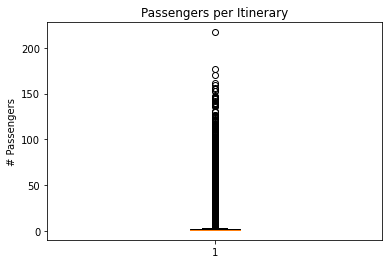

In [7]:
# Example outlier plot of reaction times
passengers = data_2015to2019['PASSENGERS']
fig1, ax1 = plt.subplots()
ax1.set_title('Passengers per Itinerary')
ax1.set_ylabel('# Passengers')
ax1.boxplot(passengers)
plt.show()

In [8]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = passengers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of passengers is: {lowerq}")
print(f"The upper quartile of passengers is: {upperq}")
print(f"The interquartile range of passengers is: {iqr}")
print(f"The the median of passengers is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of passengers is: 1.0
The upper quartile of passengers is: 2.0
The interquartile range of passengers is: 1.0
The the median of passengers is: 1.0 
Values below -0.5 could be outliers.
Values above 3.5 could be outliers.


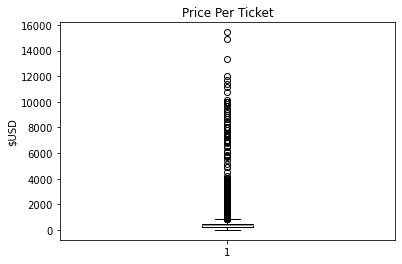

In [9]:
ticket_price = data_2015to2019['ITIN_FARE']
fig2, ax2 = plt.subplots()
ax2.set_title('Price Per Ticket')
ax2.set_ylabel('$USD')
ax2.boxplot(ticket_price)
plt.show()

In [10]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_tick = ticket_price.quantile([.25,.5,.75])
lowerq_tick = quartiles_tick[0.25]
upperq_tick = quartiles_tick[0.75]
iqr_tick = upperq_tick-lowerq_tick

print(f"The lower quartile of ticket price is: {lowerq_tick}")
print(f"The upper quartile of ticket price is: {upperq_tick}")
print(f"The interquartile range of ticket price is: {iqr_tick}")
print(f"The the median of ticket price is: {quartiles_tick[0.5]} ")

lower_bound_tick = lowerq_tick - (1.5*iqr_tick)
upper_bound_tick = upperq_tick + (1.5*iqr_tick)
print(f"Values below {lower_bound_tick} could be outliers.")
print(f"Values above {upper_bound_tick} could be outliers.")

The lower quartile of ticket price is: 250.0
The upper quartile of ticket price is: 487.0
The interquartile range of ticket price is: 237.0
The the median of ticket price is: 353.0 
Values below -105.5 could be outliers.
Values above 842.5 could be outliers.


In [11]:
data_test = data_2015to2019.loc[(data_2015to2019['PASSENGERS'] <= 4.0)]

In [12]:
data_test

,YEAR,QUARTER,DEST,TICKET_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ITIN_GEO_TYPE,ITIN_FARE,MILES_FLOWN
0,2019,1,BDL,DL,3.0,Y,2,2.0,11.0,1064.0
1,2019,1,BDL,DL,1.0,X,2,2.0,28.0,1064.0
2,2019,1,BDL,DL,1.0,X,2,2.0,159.0,1064.0
3,2019,1,BDL,DL,2.0,X,2,2.0,176.0,1064.0
4,2019,1,BDL,DL,3.0,X,2,2.0,196.0,1064.0
...,...,...,...,...,...,...,...,...,...,...
463785,2015,4,PHL,AA,2.0,X,1,2.0,550.0,674.0
463786,2015,4,PHL,AA,1.0,X,1,2.0,630.0,674.0
463787,2015,4,PHL,AA,1.0,X,1,2.0,650.0,674.0
463788,2015,4,PHL,AA,1.0,X,1,2.0,670.0,674.0


In [13]:
shrink_data = data_test.sample(n=20000)
#shrink_data["ITIN_FARE"].max()

In [14]:
passenger_fare = shrink_data['ITIN_FARE']
passenger_fare

68953     318.0
459305    284.0
451871    757.0
388530    228.0
426187    305.0
          ...  
109278    272.0
106914    702.0
318235    359.0
229129    763.0
149969    117.0
Name: ITIN_FARE, Length: 20000, dtype: float64

In [15]:
price_bins = []

for fare in passenger_fare:
    if fare < 100:
        price_bins.append('< $100')
    elif fare >= 100 and fare < 150:
        price_bins.append('$100 - $149')
    elif fare >= 150 and fare < 200:
        price_bins.append('$150 - $199')
    elif fare >= 200 and fare < 250:
        price_bins.append('$200 - $249')
    elif fare >= 250 and fare < 300:
        price_bins.append('$250 - $299')
    elif fare >= 300 and fare < 350:
        price_bins.append('$300 - $349')
    elif fare >= 350 and fare < 400:
        price_bins.append('$350 - $399')
    elif fare >= 400 and fare < 450:
        price_bins.append('$400 - $449')
    elif fare >= 450 and fare < 500:
        price_bins.append('$450 - $499')
    else:
        price_bins.append('> $500')

In [16]:
price_bins

['$300 - $349',
 '$250 - $299',
 '> $500',
 '$200 - $249',
 '$300 - $349',
 '< $100',
 '$250 - $299',
 '$400 - $449',
 '< $100',
 '$150 - $199',
 '> $500',
 '> $500',
 '> $500',
 '$300 - $349',
 '$300 - $349',
 '$400 - $449',
 '> $500',
 '$450 - $499',
 '$100 - $149',
 '> $500',
 '$350 - $399',
 '> $500',
 '$200 - $249',
 '$250 - $299',
 '> $500',
 '$250 - $299',
 '$350 - $399',
 '$350 - $399',
 '$350 - $399',
 '$150 - $199',
 '$350 - $399',
 '$250 - $299',
 '$100 - $149',
 '< $100',
 '$400 - $449',
 '$300 - $349',
 '> $500',
 '$450 - $499',
 '$300 - $349',
 '$200 - $249',
 '$150 - $199',
 '> $500',
 '$400 - $449',
 '$350 - $399',
 '> $500',
 '$150 - $199',
 '> $500',
 '$250 - $299',
 '$250 - $299',
 '> $500',
 '$350 - $399',
 '< $100',
 '$250 - $299',
 '$150 - $199',
 '$450 - $499',
 '< $100',
 '> $500',
 '$250 - $299',
 '> $500',
 '> $500',
 '$400 - $449',
 '> $500',
 '$200 - $249',
 '$300 - $349',
 '$250 - $299',
 '$100 - $149',
 '$350 - $399',
 '$400 - $449',
 '$200 - $249',
 '$450

In [17]:
shrink_data["Price_Bins"] = price_bins

In [18]:
shrink_data.head()

,YEAR,QUARTER,DEST,TICKET_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ITIN_GEO_TYPE,ITIN_FARE,MILES_FLOWN,Price_Bins
68953,2019,3,BOS,DL,1.0,X,2,2.0,318.0,1224.0,$300 - $349
459305,2015,4,DAL,WN,1.0,X,3,2.0,284.0,2104.0,$250 - $299
451871,2015,4,JFK,DL,1.0,X,1,2.0,757.0,854.0,> $500
388530,2016,4,LGA,AA,4.0,X,1,2.0,228.0,862.0,$200 - $249
426187,2015,3,ORD,AA,3.0,X,2,2.0,305.0,1292.0,$300 - $349


In [19]:
#x = shrink_data.corr()["ITIN_FARE"]
#x

In [20]:
# Defined independent (X) variables and dependent variable (y) for the model

X = shrink_data.drop(columns=['ITIN_FARE', 'Price_Bins'])
y = shrink_data['Price_Bins']
print(X.shape,y.shape)
X

(20000, 9) (20000,)


,YEAR,QUARTER,DEST,TICKET_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ITIN_GEO_TYPE,MILES_FLOWN
68953,2019,3,BOS,DL,1.0,X,2,2.0,1224.0
459305,2015,4,DAL,WN,1.0,X,3,2.0,2104.0
451871,2015,4,JFK,DL,1.0,X,1,2.0,854.0
388530,2016,4,LGA,AA,4.0,X,1,2.0,862.0
426187,2015,3,ORD,AA,3.0,X,2,2.0,1292.0
...,...,...,...,...,...,...,...,...,...
109278,2019,4,MCI,WN,1.0,X,2,2.0,1808.0
106914,2019,4,DEN,WN,1.0,Y,3,2.0,2872.0
318235,2016,2,IND,DL,1.0,X,1,2.0,978.0
229129,2017,1,MSP,DL,1.0,X,2,2.0,1960.0


In [21]:
#X_numerical = shrink_data[['YEAR','QUARTER','PASSENGERS','DISTANCE_GROUP','ITIN_GEO_TYPE','MILES_FLOWN']]
#X_categorical = shrink_data[['DEST','TICKET_CARRIER','FARE_CLASS']]
X_2 = pd.get_dummies(X)
X_2

,YEAR,QUARTER,PASSENGERS,DISTANCE_GROUP,ITIN_GEO_TYPE,MILES_FLOWN,DEST_ALB,DEST_ATL,DEST_AUS,DEST_BDL,...,TICKET_CARRIER_US,TICKET_CARRIER_VX,TICKET_CARRIER_WN,FARE_CLASS_C,FARE_CLASS_D,FARE_CLASS_F,FARE_CLASS_G,FARE_CLASS_U,FARE_CLASS_X,FARE_CLASS_Y
68953,2019,3,1.0,2,2.0,1224.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
459305,2015,4,1.0,3,2.0,2104.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
451871,2015,4,1.0,1,2.0,854.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
388530,2016,4,4.0,1,2.0,862.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426187,2015,3,3.0,2,2.0,1292.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109278,2019,4,1.0,2,2.0,1808.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
106914,2019,4,1.0,3,2.0,2872.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
318235,2016,2,1.0,1,2.0,978.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
229129,2017,1,1.0,2,2.0,1960.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
#X_2 = X_categorical.apply(label_encoder.fit_transform)
yy = label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

#X_2

In [23]:
encoded_y

array([4, 3, 9, ..., 5, 9, 0])

In [24]:
#from tensorflow.keras.utils import to_categorical

# 1. INSTANTIATE
#enc = OneHotEncoder()

# 2. FIT
#enc.fit(X_2)

# 3. Transform
#onehotlabels = enc.transform(X_2).toarray()
#onehotlabels.shape

#one_hot_X = to_categorical(X_2)
#one_hot_X

In [25]:
#X_new = onehotlabels + X_numerical

In [26]:
#type(onehotlabels)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, encoded_y, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.utils import to_categorical

#X_train_categorical = to_categorical(X_train)
#X_test_categorical = to_categorical(X_test)
#X_train_categorical
X_scaler = StandardScaler().fit(X_train)

In [29]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
X_train_scaled = np.asarray(X_train_scaled)
y_train = np.asarray(y_train)
X_test_scaled = np.asarray(X_test_scaled)
y_test = np.asarray(y_test)

In [31]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [32]:
from tensorflow.keras.layers import Dense
number_inputs = 90
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [33]:
number_classes = 10
model.add(Dense(units=number_classes, activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 364       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 414
Trainable params: 414
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    #verbose=2
)

Train on 15000 samples
Epoch 1/100
15000/15000 [==============================] - 3s 172us/sample - loss: 2.2427 - accuracy: 0.2111
Epoch 2/100
15000/15000 [==============================] - 1s 87us/sample - loss: 2.0783 - accuracy: 0.2583
Epoch 3/100
15000/15000 [==============================] - 1s 84us/sample - loss: 2.0149 - accuracy: 0.2739
Epoch 4/100
15000/15000 [==============================] - 1s 84us/sample - loss: 1.9833 - accuracy: 0.2867
Epoch 5/100
15000/15000 [==============================] - 1s 91us/sample - loss: 1.9684 - accuracy: 0.2879
Epoch 6/100
15000/15000 [==============================] - 1s 91us/sample - loss: 1.9599 - accuracy: 0.2867
Epoch 7/100
15000/15000 [==============================] - 1s 96us/sample - loss: 1.9546 - accuracy: 0.2865
Epoch 8/100
15000/15000 [==============================] - 1s 88us/sample - loss: 1.9500 - accuracy: 0.2882
Epoch 9/100
15000/15000 [==============================] - 1s 97us/sample - loss: 1.9470 - accuracy: 0.2905
Epoc

In [ ]:
model_train_accuracy = model.score(X_train_scaled, y_train)
model_test_accuracy = model.score(X_test_scaled, y_test)
print(f"Training Data Score: {model_train_accuracy}")
print(f"Testing Data Score: {model_test_accuracy}")